In [2]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns

In [3]:
api_key = 'API KEY'
channel_ids = ['UC4PQqjGczpgmqbpicKjkwvw',  #druski
              'UCxOzbkk0bdVl6-tH1Fcajfg',  #betaSquad
              'UCJbYdyufHR-cxOuY96KIoqA',  #AMP
              'UCO_RC-EuZVTkxm5e8ek1zvA' #duke dennis
              ]

youtube = build('youtube','v3',developerKey=api_key)

In [4]:
## function to get channel statistics

def get_channel_stats(youtube, channel_ids):
  all_data = []
  request = youtube.channels().list(
      part = 'snippet,contentDetails,statistics',
      id=','.join(channel_ids))
  response = request.execute()


  for i in range(len(response['items'])):
     data = dict(Channel_name = response['items'][i]['snippet']['title'],
                 Subscribers = response['items'][i]['statistics']['subscriberCount'],
                 Views = response['items'][i]['statistics']['viewCount'],
                 Total_videos = response['items'][i]['statistics']['videoCount'],
                 playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads']
                 )
     all_data.append(data)

  return all_data

In [5]:
channel_statistics = get_channel_stats(youtube, channel_ids)
channel_statistics

[{'Channel_name': 'AMP',
  'Subscribers': '6590000',
  'Views': '751052984',
  'Total_videos': '207',
  'playlist_id': 'UUJbYdyufHR-cxOuY96KIoqA'},
 {'Channel_name': 'Druski',
  'Subscribers': '2150000',
  'Views': '467551630',
  'Total_videos': '600',
  'playlist_id': 'UU4PQqjGczpgmqbpicKjkwvw'},
 {'Channel_name': 'Duke Dennis',
  'Subscribers': '2980000',
  'Views': '166577372',
  'Total_videos': '163',
  'playlist_id': 'UUO_RC-EuZVTkxm5e8ek1zvA'},
 {'Channel_name': 'Beta Squad',
  'Subscribers': '10200000',
  'Views': '1429138563',
  'Total_videos': '159',
  'playlist_id': 'UUxOzbkk0bdVl6-tH1Fcajfg'}]

In [6]:
channel_data = pd.DataFrame(channel_statistics)
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,AMP,6590000,751052984,207,UUJbYdyufHR-cxOuY96KIoqA
1,Druski,2150000,467551630,600,UU4PQqjGczpgmqbpicKjkwvw
2,Duke Dennis,2980000,166577372,163,UUO_RC-EuZVTkxm5e8ek1zvA
3,Beta Squad,10200000,1429138563,159,UUxOzbkk0bdVl6-tH1Fcajfg


In [7]:
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])
channel_data.dtypes

,0
Channel_name,object
Subscribers,int64
Views,int64
Total_videos,int64
playlist_id,object


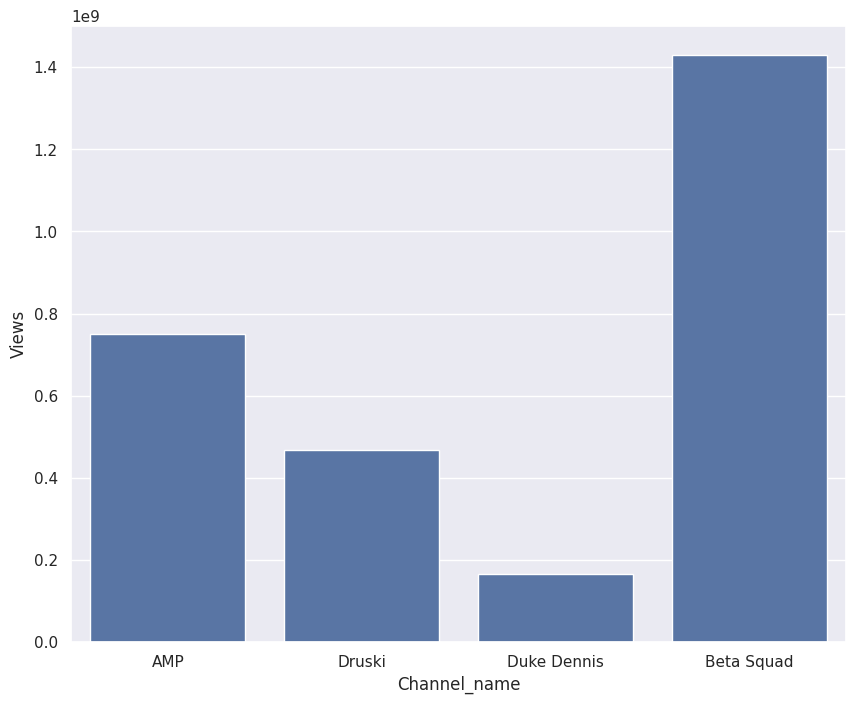

In [8]:
sns.set(rc= {'figure.figsize':(10,8)})
ax = sns.barplot(x='Channel_name', y='Views', data=channel_data)

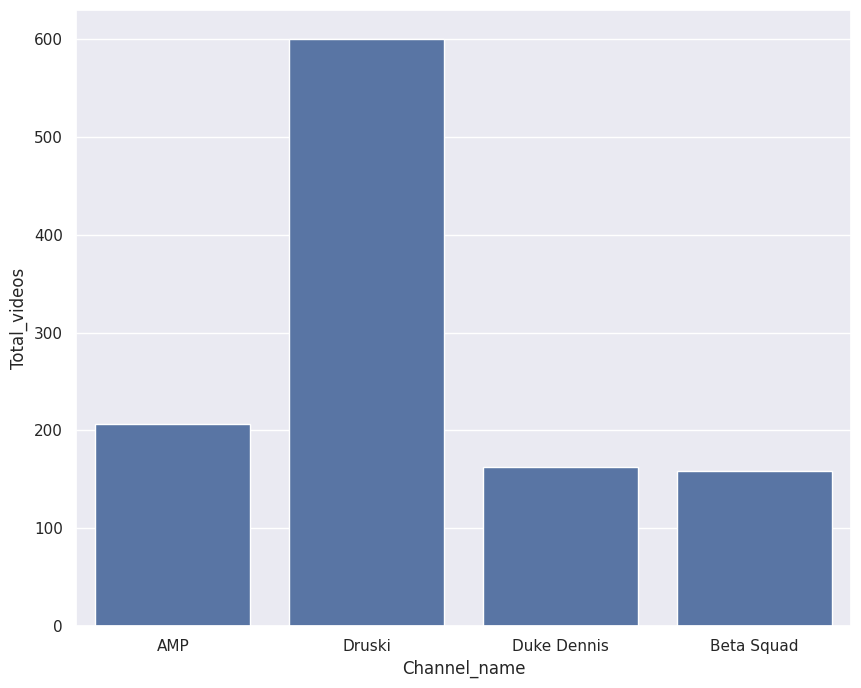

In [9]:
ax = sns.barplot(x='Channel_name', y='Total_videos', data=channel_data)

In [10]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,AMP,6590000,751052984,207,UUJbYdyufHR-cxOuY96KIoqA
1,Druski,2150000,467551630,600,UU4PQqjGczpgmqbpicKjkwvw
2,Duke Dennis,2980000,166577372,163,UUO_RC-EuZVTkxm5e8ek1zvA
3,Beta Squad,10200000,1429138563,159,UUxOzbkk0bdVl6-tH1Fcajfg


In [11]:
playlist_id = channel_data.loc[channel_data['Channel_name'] == 'Beta Squad', 'playlist_id'].iloc[0]

In [12]:
## function to get video ids

def get_videos_ids(youtube, playlist_id):

  request = youtube.playlistItems().list(
      part = 'contentDetails',
      playlistId = playlist_id,
      maxResults = 50
  )
  response = request.execute()
  video_ids = []

  next_page_token = response.get('nextPageToken')
  more_pages = True

  for i in range(len(response['items'])):
    video_ids.append(response['items'][i]['contentDetails']['videoId'])

  response = request.execute()

  while more_pages:
    if next_page_token is None:
      more_pages = False
    else:
      request = youtube.playlistItems().list(
        part = 'contentDetails',
        playlistId = playlist_id,
        maxResults = 50,
        pageToken = next_page_token)

      response = request.execute()

      for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

      next_page_token = response.get('nextPageToken')


  return video_ids


In [13]:
video_ids = get_videos_ids(youtube, playlist_id)

In [14]:
video_ids

['_32QyCVw6Ig',
 'MZHa5cIisAw',
 'T-Ky46HVkd0',
 '3gXq2QA_zN4',
 'ChEmvP52p0U',
 'kaTv2rHK9Gw',
 'O2ZCj6Esbf8',
 '_SGvpvubRoE',
 'hfFxnsLJk4U',
 'ajf9eCaGzqk',
 '7D8_BLBMru0',
 'Kd_UqfRhN44',
 '8sq65pZL-JI',
 'm94frqMy0-c',
 'benx0rLWi5I',
 'GlUp3MCIQIk',
 'VMINt7xcMBU',
 'z5qHEhnabnE',
 'IvZxf5wpUyc',
 '15S9PKgnX9k',
 'j-PJp8EXv-o',
 'i0MFIho4vuc',
 'KGMkJm7qOok',
 'ZLRyTFIZOIs',
 'dCazvNiKfN4',
 'OqGH_6mLQjI',
 'daeVNcp26As',
 'PIZTnU9p6UA',
 'N1MBElbotLc',
 'OfALmGupms8',
 'K8honfbxGqM',
 'kOexvM1iSzs',
 'ZrTZBjHoMqs',
 '60AbAymEkls',
 'WFFeXYlhtkc',
 '9PAcG_wvVHU',
 'UgWHrA0-EOk',
 'uwfrPINW67g',
 '-8USSBGGu2g',
 'Aoj3RBJSYU8',
 'vlAF98IPTSQ',
 'zVXsupjMBR0',
 'J7exm02NVHo',
 '20MkCaGswco',
 '_1EsQq95xBA',
 'TGLEzvSzjjk',
 'Lb2mZ8wARZc',
 'QEaKd7FiLLo',
 'QMBBzT5yx08',
 'cNZtsGTvJeY',
 'fTZZRKp_Ddg',
 'lqAFHewbG9Q',
 'CgS7WfFvjKk',
 'HWTSOL1wJrM',
 'rSnQR7vGqMY',
 '8NPSL9rCOss',
 '6iNEruSxWVg',
 '4PclIkHnyHs',
 '2l7D_fa5ScQ',
 'eBYTol2UoHA',
 'k8Gdlbw-DIY',
 'wdAva6xBjOQ',
 'Sp99mT

In [22]:
def get_video_details(youtube, video_ids):
  all_video_stats = []

  for i in range(0, len(video_ids), 50):
    request = youtube.videos().list(
        part = 'snippet,statistics',
        id = ','.join(video_ids[i:i+50])
    )
  response = request.execute()

  for video in response['items']:
    video_stats = dict(Title = video['snippet']['title'],
                        Published_date = video['snippet']['publishedAt'],
                        Views = video['statistics']['viewCount'],
                        Likes = video['statistics']['likeCount'],
                        Comments = video['statistics']['commentCount']
                        )
    all_video_stats.append(video_stats)

  return all_video_stats

In [23]:
get_video_details(youtube, video_ids)

[{'Title': 'Living on £1 for 24 Hours - £10,000 Challenge',
  'Published_date': '2019-07-07T13:00:01Z',
  'Views': '3852792',
  'Likes': '99455',
  'Comments': '2709'},
 {'Title': 'Who Can WIN The Most Money in 24 Hours Challenge',
  'Published_date': '2019-06-25T16:13:59Z',
  'Views': '4631079',
  'Likes': '112963',
  'Comments': '3614'},
 {'Title': 'Last To Get Shot Wins £10,000 Challenge - Mafia',
  'Published_date': '2019-06-16T16:39:58Z',
  'Views': '5848750',
  'Likes': '129050',
  'Comments': '4314'},
 {'Title': 'Who Can Make The BIGGEST FOOD Challenge (GIANT BURGER)',
  'Published_date': '2019-06-08T15:41:08Z',
  'Views': '5916358',
  'Likes': '153845',
  'Comments': '3359'},
 {'Title': '$10 HOTEL VS $10,000,000 HOTEL CHALLENGE',
  'Published_date': '2019-06-03T16:19:04Z',
  'Views': '6349479',
  'Likes': '180520',
  'Comments': '4937'},
 {'Title': 'Who Can Make The LOUDEST SOUND Challenge',
  'Published_date': '2019-05-26T12:00:03Z',
  'Views': '2829459',
  'Likes': '84711',
 

In [26]:
video_data = pd.DataFrame(get_video_details(youtube, video_ids))
video_data

,Title,Published_date,Views,Likes,Comments
0,"Living on £1 for 24 Hours - £10,000 Challenge",2019-07-07T13:00:01Z,3852792,99455,2709
1,Who Can WIN The Most Money in 24 Hours Challenge,2019-06-25T16:13:59Z,4631079,112963,3614
2,"Last To Get Shot Wins £10,000 Challenge - Mafia",2019-06-16T16:39:58Z,5848750,129050,4314
3,Who Can Make The BIGGEST FOOD Challenge (GIANT...,2019-06-08T15:41:08Z,5916358,153845,3359
4,"$10 HOTEL VS $10,000,000 HOTEL CHALLENGE",2019-06-03T16:19:04Z,6349506,180521,4937
5,Who Can Make The LOUDEST SOUND Challenge,2019-05-26T12:00:03Z,2829459,84711,2554
6,"Destroy The Unbreakable Box, Win £10,000 - Cha...",2019-05-19T15:24:21Z,3844392,104115,2318
7,SLIME POOL PRANK (Mystery Wheel Challenge),2019-05-11T16:28:10Z,2299561,67470,2088
8,Who Can MAKE The MOST MONEY in 24 Hours Challenge,2019-05-04T14:00:26Z,2983757,89442,3458
9,INTRODUCING... Beta Squad,2019-02-22T18:59:32Z,1716631,66529,2628


In [27]:
video_data['Published_date'] = pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Likes'] = pd.to_numeric(video_data['Likes'])
video_data

,Title,Published_date,Views,Likes,Comments
0,"Living on £1 for 24 Hours - £10,000 Challenge",2019-07-07,3852792,99455,2709
1,Who Can WIN The Most Money in 24 Hours Challenge,2019-06-25,4631079,112963,3614
2,"Last To Get Shot Wins £10,000 Challenge - Mafia",2019-06-16,5848750,129050,4314
3,Who Can Make The BIGGEST FOOD Challenge (GIANT...,2019-06-08,5916358,153845,3359
4,"$10 HOTEL VS $10,000,000 HOTEL CHALLENGE",2019-06-03,6349506,180521,4937
5,Who Can Make The LOUDEST SOUND Challenge,2019-05-26,2829459,84711,2554
6,"Destroy The Unbreakable Box, Win £10,000 - Cha...",2019-05-19,3844392,104115,2318
7,SLIME POOL PRANK (Mystery Wheel Challenge),2019-05-11,2299561,67470,2088
8,Who Can MAKE The MOST MONEY in 24 Hours Challenge,2019-05-04,2983757,89442,3458
9,INTRODUCING... Beta Squad,2019-02-22,1716631,66529,2628


In [28]:
top10_videos = video_data.sort_values(by='Views', ascending=False).head(10)
top10_videos

,Title,Published_date,Views,Likes,Comments
4,"$10 HOTEL VS $10,000,000 HOTEL CHALLENGE",2019-06-03,6349506,180521,4937
3,Who Can Make The BIGGEST FOOD Challenge (GIANT...,2019-06-08,5916358,153845,3359
2,"Last To Get Shot Wins £10,000 Challenge - Mafia",2019-06-16,5848750,129050,4314
1,Who Can WIN The Most Money in 24 Hours Challenge,2019-06-25,4631079,112963,3614
0,"Living on £1 for 24 Hours - £10,000 Challenge",2019-07-07,3852792,99455,2709
6,"Destroy The Unbreakable Box, Win £10,000 - Cha...",2019-05-19,3844392,104115,2318
8,Who Can MAKE The MOST MONEY in 24 Hours Challenge,2019-05-04,2983757,89442,3458
5,Who Can Make The LOUDEST SOUND Challenge,2019-05-26,2829459,84711,2554
7,SLIME POOL PRANK (Mystery Wheel Challenge),2019-05-11,2299561,67470,2088
9,INTRODUCING... Beta Squad,2019-02-22,1716631,66529,2628


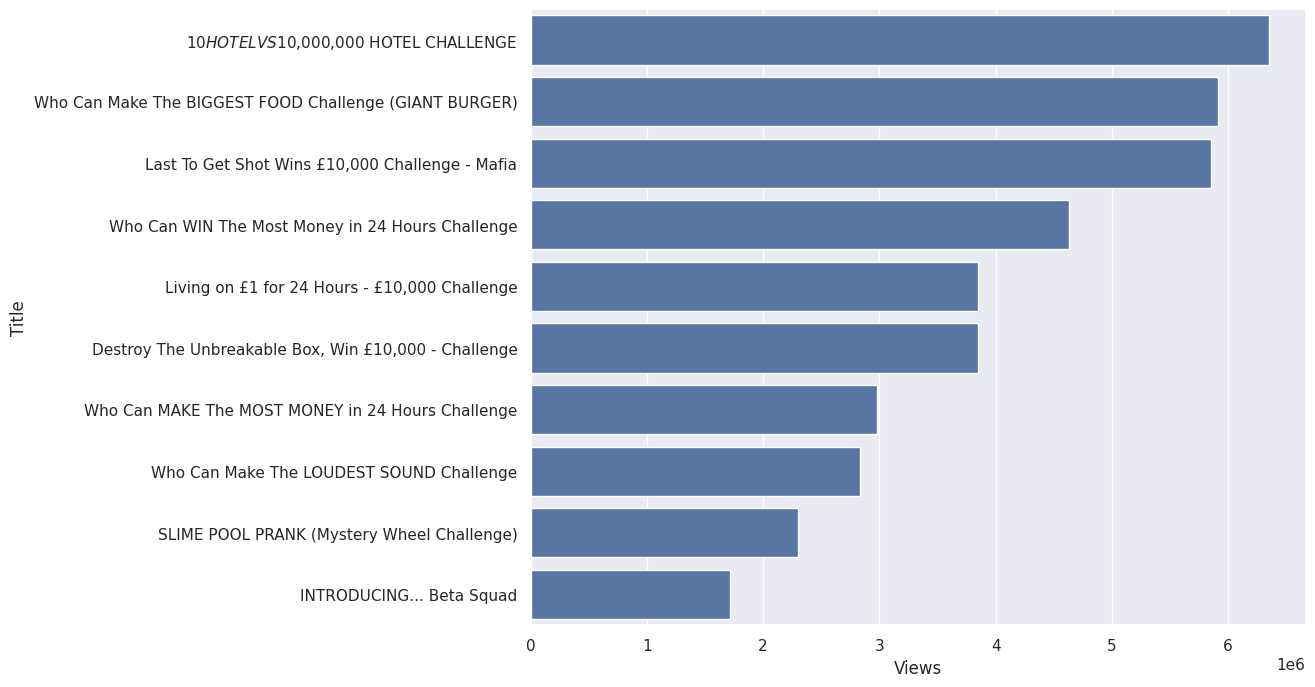

In [29]:
ax1 = sns.barplot(x='Views', y='Title', data=top10_videos)